<a href="https://colab.research.google.com/github/ChitteshKumar/udemy_deep_learning_tutorials/blob/main/LongDistanceProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LONG DISTANCE PROBLEM


In [2]:
from tensorflow.keras.layers import Input,Dense,SimpleRNN,LSTM, GRU, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#dataset
T = 10
D = 1
X=[]
Y = []
def get_label(x, i1,i2,i3):
  #here x is a sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  else:
    return 0

for i in range(5000):
  x = np.random.randn(T) #random noise
  X.append(x)
  y= get_label(x,-1,-2,-3) #for short distance (last three data points in the sequence)
  # y= get_label(x,0,1,2) #for long distance (first three data points in the sequence)
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

# in this problem, we consider the sign of the value (> or < 0) (each quadrant representing a class)


In [4]:
#trying the linear model
input = Input(shape=(T,))
output = Dense(1, activation='sigmoid')(input)
model = Model(input, output)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.01),
    metrics = ['accuracy'],
)

r = model.fit(
    X, Y,
    epochs = 100,
    validation_split=0.5
)



Epoch 1/100
79/79 [==============================] - 1s 5ms/step - loss: 0.7647 - accuracy: 0.5204 - val_loss: 0.7095 - val_accuracy: 0.4976
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.5264 - val_loss: 0.6979 - val_accuracy: 0.5148
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5236 - val_loss: 0.6966 - val_accuracy: 0.5172
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5268 - val_loss: 0.6948 - val_accuracy: 0.5168
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5172 - val_loss: 0.6946 - val_accuracy: 0.5112
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5156 - val_loss: 0.6961 - val_accuracy: 0.5240
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5384 - val_loss: 0.6977 - val_accuracy: 0.5068
Epoch 8/100
7

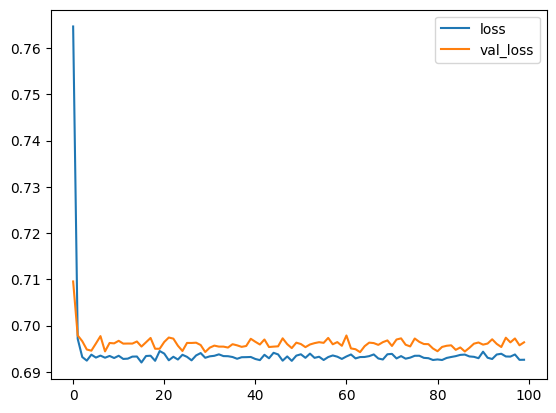

In [5]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

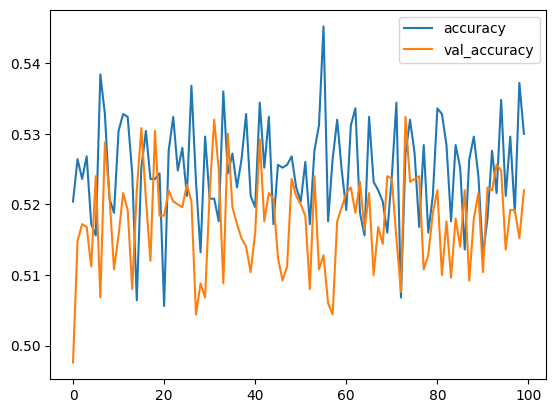

In [6]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [7]:
#trying the SimpleRNN
inputs = np.expand_dims(X,-1)

input = Input(shape=(T,D))

#method-1
#output = LSTM(5)(input)
output = SimpleRNN(5)(input)
#output = GRU(5)(input)

#method-2
#output = LSTM(5, return_sequences=True)(input)
#output = GlobalMaxPool1D()(output)

output = Dense(1, activation='sigmoid')(output)
model = Model(input, output)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.01), #SGD can also be used
    metrics = ['accuracy'],
)

#train the model
r = model.fit(
    inputs,Y,
    epochs=200,
    validation_split=0.5
)

Epoch 1/200
79/79 [==============================] - 2s 8ms/step - loss: 0.6939 - accuracy: 0.5212 - val_loss: 0.6904 - val_accuracy: 0.5408
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6810 - accuracy: 0.5580 - val_loss: 0.6785 - val_accuracy: 0.6000
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6502 - accuracy: 0.6248 - val_loss: 0.6423 - val_accuracy: 0.5860
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6027 - accuracy: 0.6124 - val_loss: 0.5958 - val_accuracy: 0.5980
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5612 - accuracy: 0.6440 - val_loss: 0.5637 - val_accuracy: 0.5892
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5344 - accuracy: 0.6520 - val_loss: 0.5415 - val_accuracy: 0.6568
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5074 - accuracy: 0.6760 - val_loss: 0.4932 - val_accuracy: 0.7528
Epoch 8/200
7

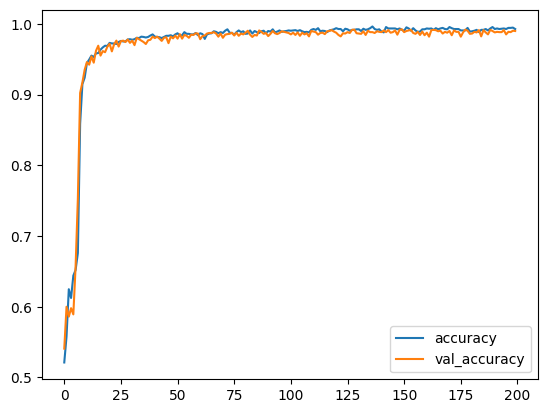

In [8]:
#plot the accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

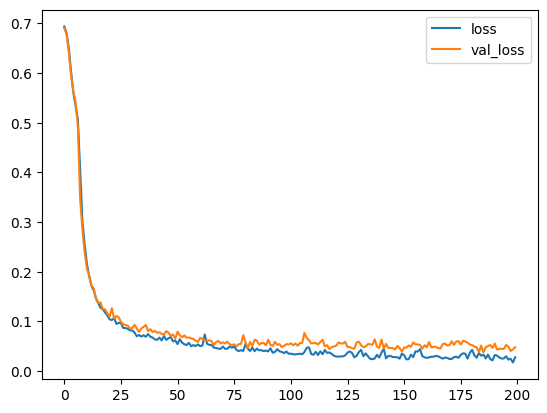

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [10]:
#building dataset - long distance
T = 10 #sequence length
D = 1
X = []
Y = []

for i in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x,0,1,2) #long dist., first three data from the sequence.
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [13]:
#trying simple RNN - for long distance
inputs = np.expand_dims(X,-1) #expand dimensions
i = Input(shape=(T,D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

#train the model
r = model.fit(
    inputs,Y,
    epochs=200,
    validation_split=0.5
)

Epoch 1/200
79/79 [==============================] - 2s 10ms/step - loss: 0.7247 - accuracy: 0.5032 - val_loss: 0.6986 - val_accuracy: 0.4880
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6955 - accuracy: 0.5120 - val_loss: 0.7004 - val_accuracy: 0.4956
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6961 - accuracy: 0.5160 - val_loss: 0.6951 - val_accuracy: 0.5020
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6935 - accuracy: 0.5180 - val_loss: 0.6957 - val_accuracy: 0.4960
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6927 - accuracy: 0.5200 - val_loss: 0.6972 - val_accuracy: 0.4940
Epoch 6/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6927 - accuracy: 0.5044 - val_loss: 0.6966 - val_accuracy: 0.5020
Epoch 7/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6948 - accuracy: 0.5184 - val_loss: 0.6968 - val_accuracy: 0.5036
Epoch 8/20

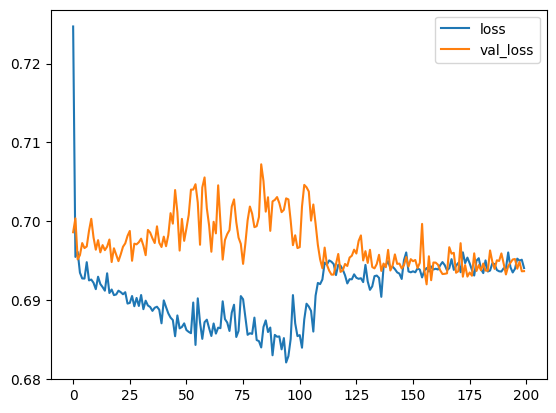

In [14]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

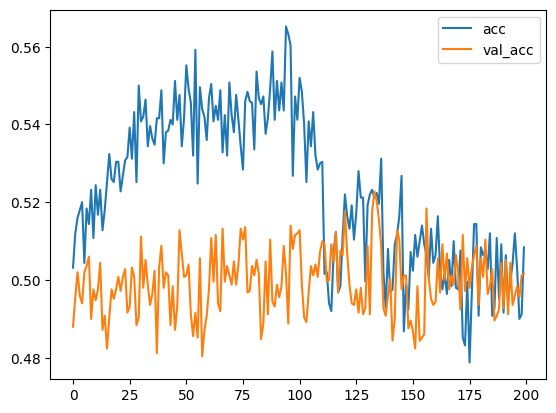

In [18]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Here we get to know that in long distance data, it is harder for RNN to learn the data. Sometimes it does not learn at all.